In [1]:
from torchvision.models import detection
import numpy as np
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

In [2]:
MODELS = {
	"frcnn-resnet": {
        "type": detection.fasterrcnn_resnet50_fpn,
        "classes": [
            "a", "b", "c", "d", "e", "f", "g", "h", "i", "j",  # 10
            "aa", "bb", "bc", "bd", "be", "bf", "bg", "bh", "kutya", "bj",  # 20
            "ca", "cb", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj",  # 30
            "da", "db", "dc", "dd", "de", "df", "dg", "dh", "di", "dj",  # 40
            "ea", "eb", "ec", "ed", "ee", "ef", "eg", "eh", "ei", "ej",  # 50
            "fa", "fb", "fc", "fd", "fe", "ff", "fg", "fh", "fi", "fj",  # 60
            "ga", "gb", "szék", "kanapé", "ge", "gf", "gg", "gh", "gi", "gj",  # 70
            "ha", "hb", "hc", "hd", "he", "hf", "hg", "hh", "hi", "hj",  # 80
            "ia", "ib", "ic", "id", "ie", "if", "ig", "ih", "ii", "ij",  # 90
            "ja",
            ]
        },
	"frcnn-mobilenet": detection.fasterrcnn_mobilenet_v3_large_320_fpn,
	"retinanet": detection.retinanet_resnet50_fpn
}
MODEL = "frcnn-resnet"
model = MODELS[MODEL]["type"](pretrained=True, progress=True,
	num_classes=len(MODELS[MODEL]["classes"]), pretrained_backbone=True).to(DEVICE)
model.eval()

/home/mordie/miniconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mordie/miniconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/mordie/miniconda3/envs/pytorch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/home/mordie/miniconda3/envs/pytorch/lib

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
torch.save(model, f"../models/{MODEL}.pth")

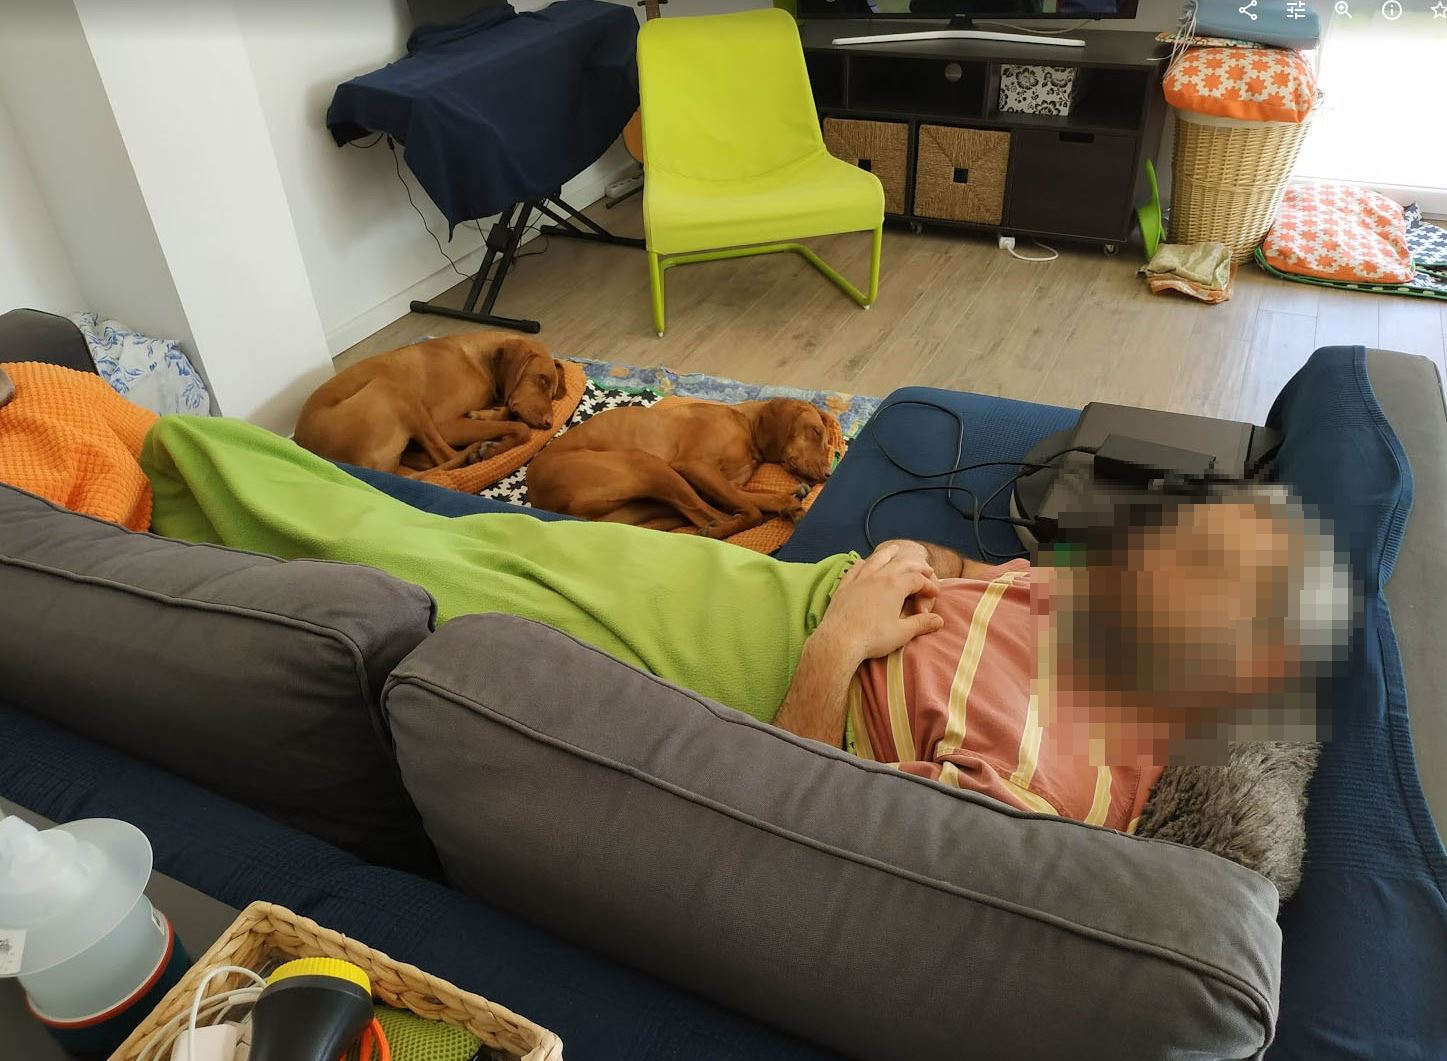

In [5]:
from PIL import Image

image = Image.open("../images/sleepers.jpg")
image.show()

In [6]:
image.size

(1447, 1061)

In [7]:
image = image.resize((256, 224))

In [8]:
n_image = np.array(image)
n_image.shape

(224, 256, 3)

In [9]:
e_image = np.expand_dims(np.array(image).transpose(2, 0, 1), axis=0)
e_image = e_image / 255.0
e_image = torch.FloatTensor(e_image)
e_image.shape

torch.Size([1, 3, 224, 256])

In [10]:
e_image = e_image.to(DEVICE)
detections = model(e_image)[0]

In [12]:
from PIL import ImageDraw, ImageFont

image = Image.open("../images/sleepers.jpg")
image = image.resize((256, 224))
canvas = ImageDraw.Draw(image)

In [13]:
CONFIDENCE = 0.9
CLASSES = MODELS[MODEL]["classes"]
COLORS = list(tuple(x) for x in np.random.randint(low=0, high=255, size=(len(CLASSES), 3)))

_font = ImageFont.truetype("/mnt/c/Windows/Fonts/ARIALN.TTF", 11)  # c:\Windows\Fonts\ARIALN.TTF 

[INFO] kutya: 99.78%
[INFO] szék: 99.13%
[INFO] kutya: 94.21%
[INFO] kanapé: 93.02%


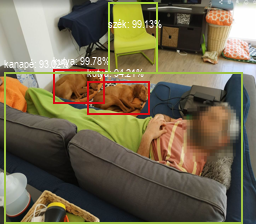

In [14]:
for i in range(0, len(detections["boxes"])):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections["scores"][i]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > CONFIDENCE:
		# extract the index of the class label from the detections,
		# then compute the (x, y)-coordinates of the bounding box
		# for the object
		idx = int(detections["labels"][i])
		box = detections["boxes"][i].detach().cpu().numpy()
		(startX, startY, endX, endY) = box.astype("int")
		# display the prediction to our terminal
		label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
		print("[INFO] {}".format(label))
		# draw the bounding box and label on the image
		# cv2.rectangle(orig, (startX, startY), (endX, endY), COLORS[idx], 2)
		canvas.rectangle([(startX, startY), (endX, endY)], outline=COLORS[idx], width=2)
		
		y = startY - 15 if startY - 15 > 15 else startY + 15
		#cv2.putText(orig, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
		canvas.text(xy=(startX, y), text=label, font=_font)

image.show()

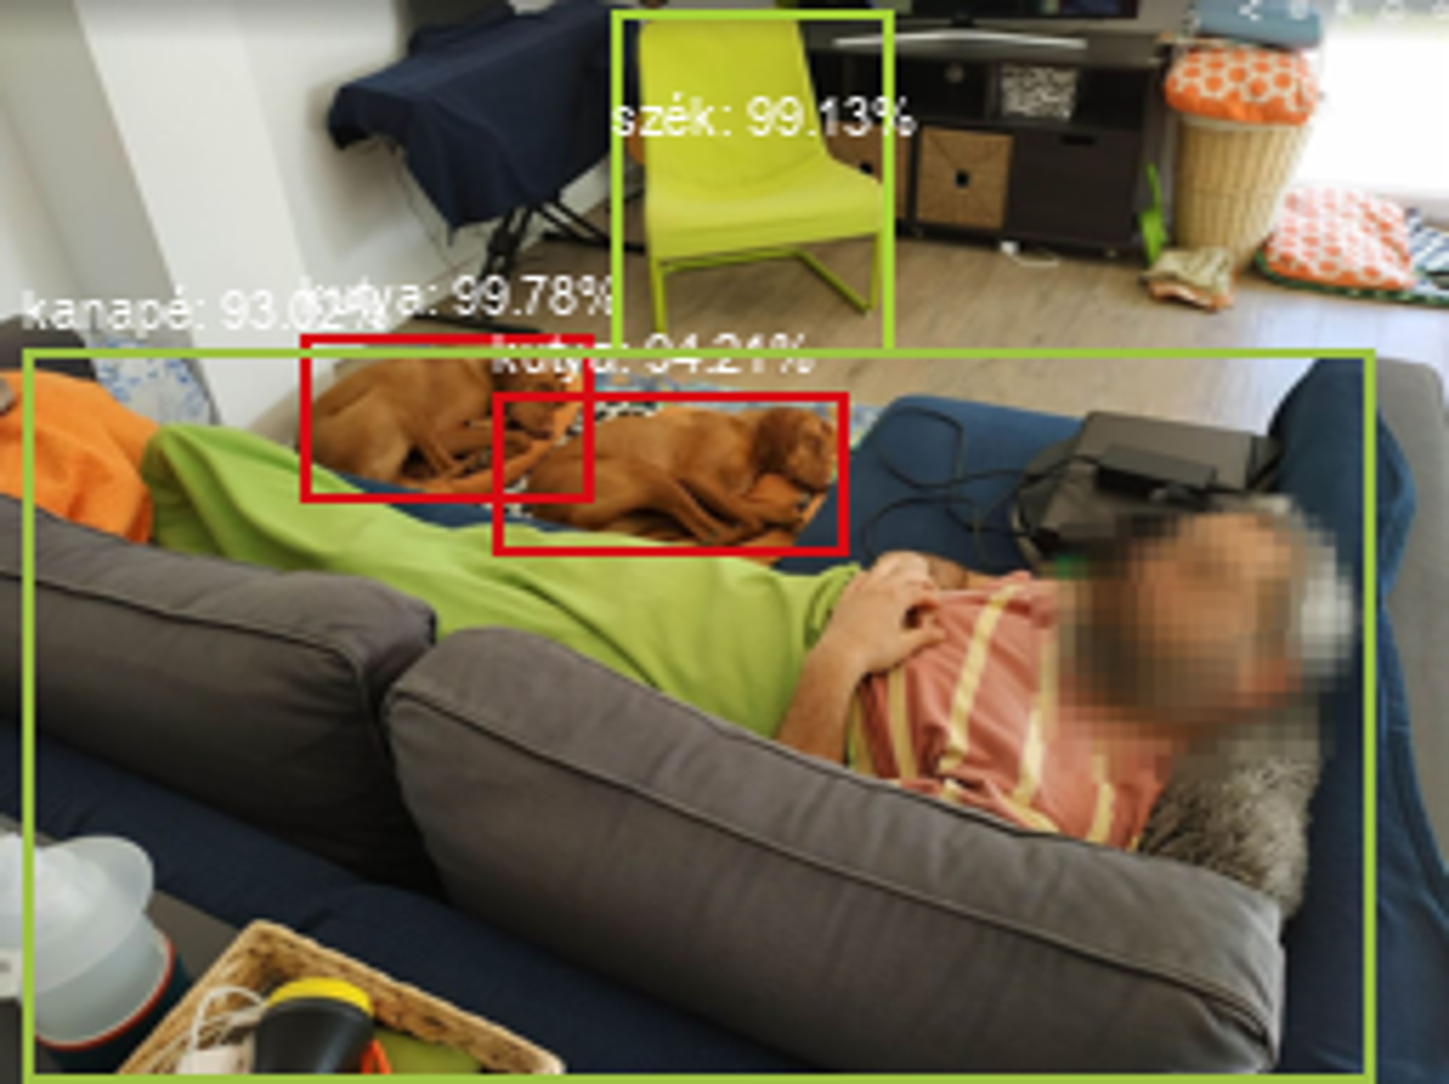

In [15]:
image = image.resize((1449, 1084))
image.show()